In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
# Load the Dataset
# Replace with your actual CSV path or URL
df = pd.read_csv('heart_cleveland_upload.csv')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (297, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
#Explore the Data
print("\n Dataset Info:")
print(df.info())

print("\n Descriptive Statistics:")
print(df.describe())

print("\n Missing Values:")
print(df.isnull().sum())


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None

 Descriptive Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.0000

In [5]:
# Handle Missing Values
# Fill numeric columns with mean
df.fillna(df.mean(), inplace=True)

In [8]:
# Handle Outliers (example)
# Simple Z-score method to detect outliers
from scipy import stats
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
print("\n Rows with outliers (Z > 3):", (z_scores > 3).sum())


 Rows with outliers (Z > 3): 9


In [9]:
#Normalize Numerical Features
# Identify numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Exclude the target column if needed
num_cols = [col for col in num_cols if col != 'TargetColumn']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("\n Numerical features normalized!")


 Numerical features normalized!


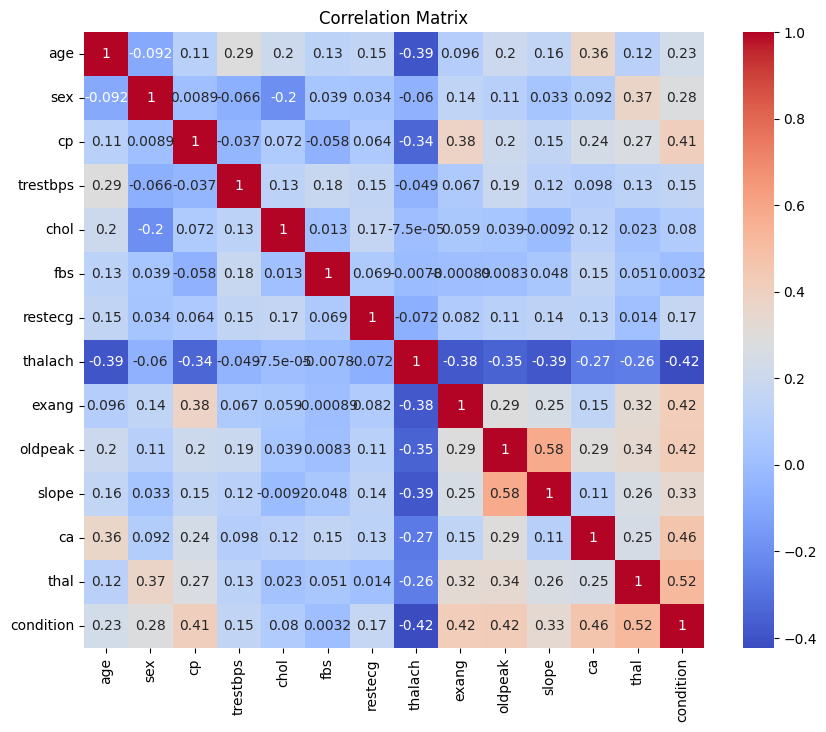

In [46]:
# Visualize Data Relationships
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

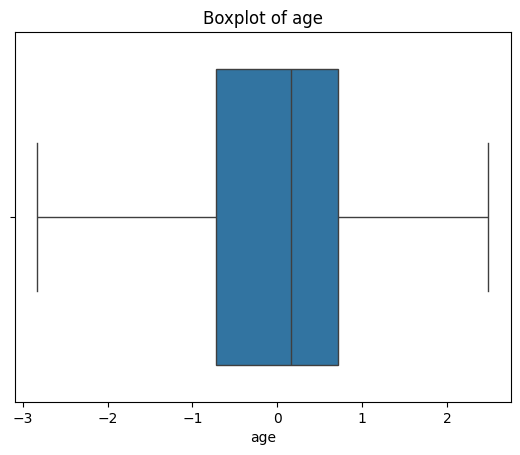

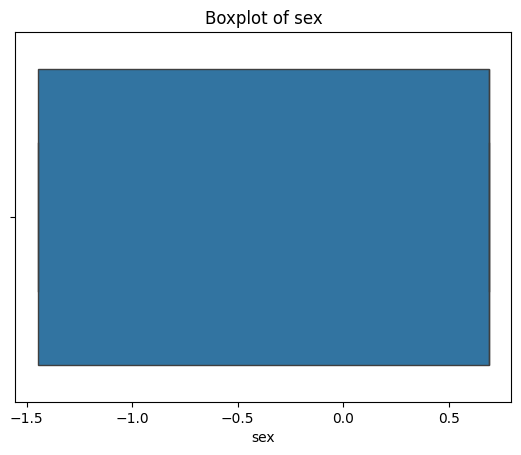

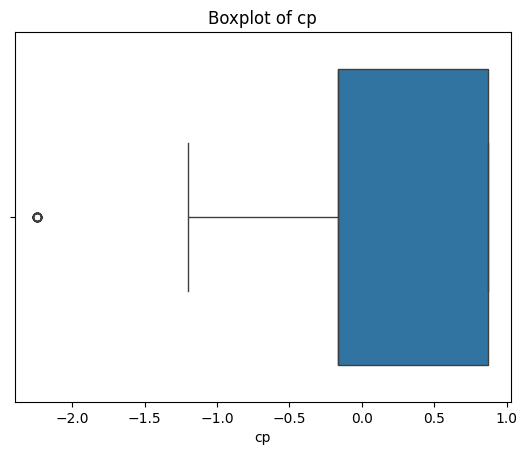

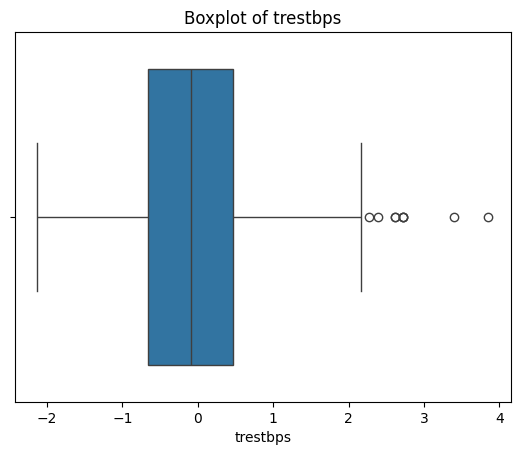

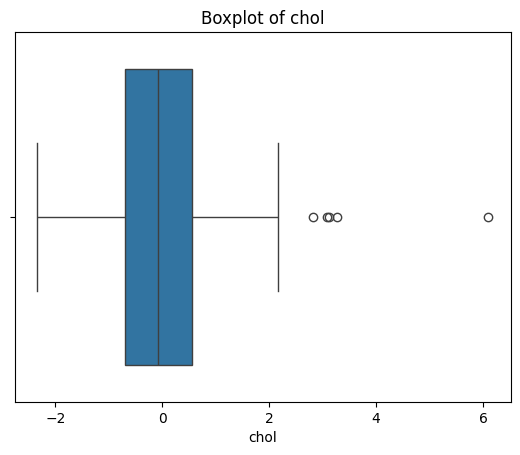

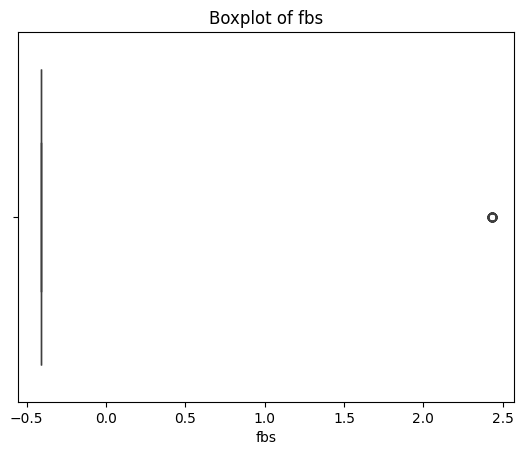

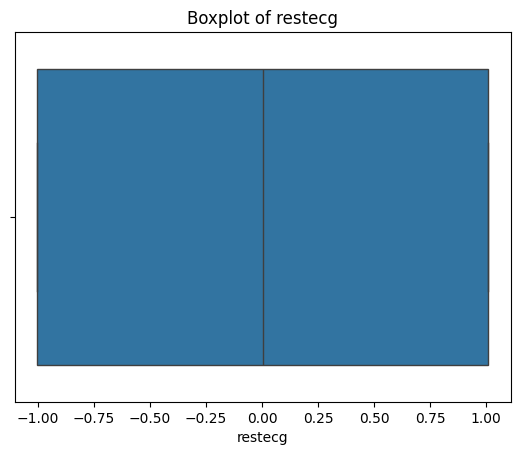

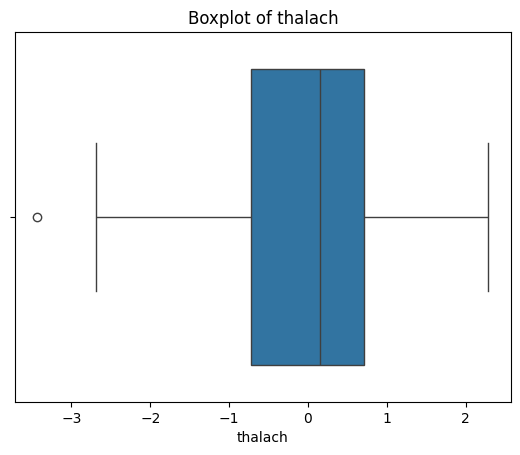

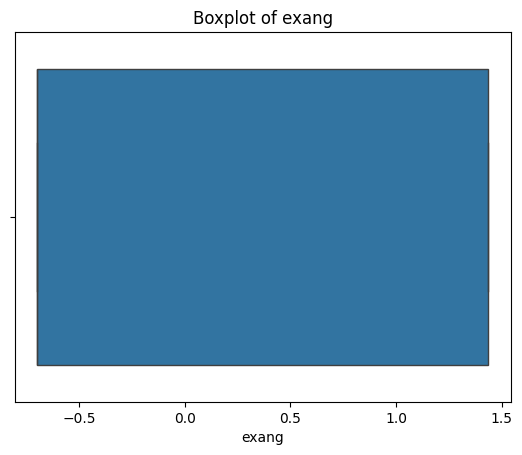

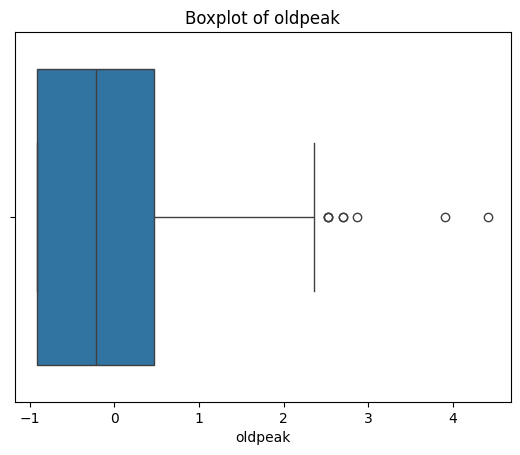

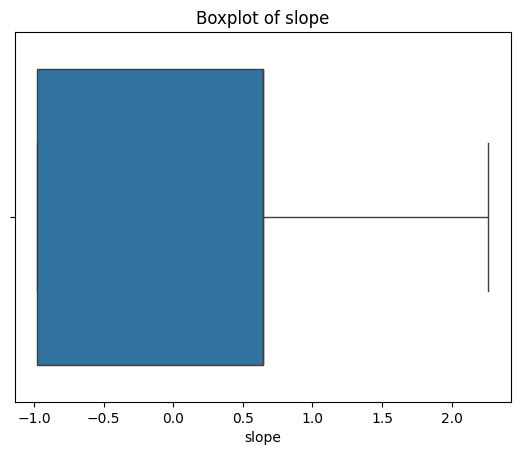

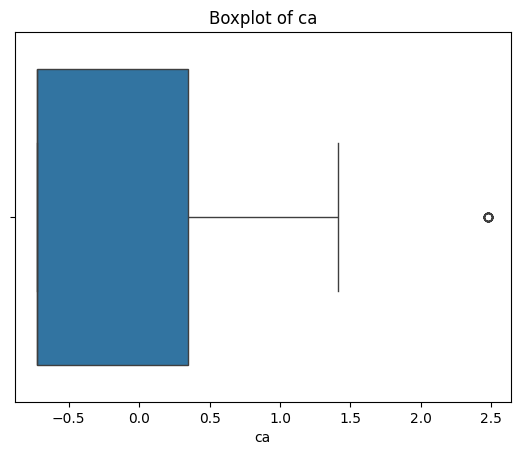

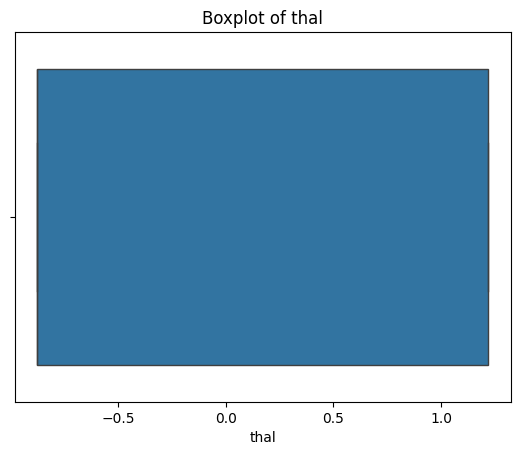

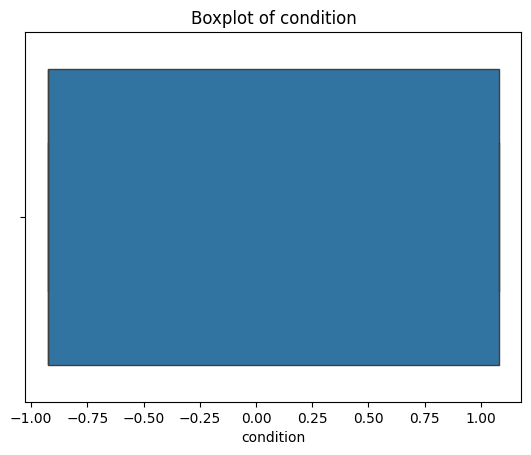

In [11]:
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [23]:
# Split Data for Model Evaluation
# Replace 'TargetColumn' with your actual target variable
X = df.drop('condition', axis=1)
y = df['condition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("\n Data split completed!")
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


 Data split completed!
Training set: (237, 13), Test set: (60, 13)


**Model Selection and Development**

In [25]:
#Import Libraries for Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler


In [26]:
# 1. Separate features & target FIRST!
X = df.drop('condition', axis=1)
y = df['condition']

# Check original unique values
print("Original target values:", y.unique())

#Convert any positive to 1, else 0
y = y.apply(lambda x: 1 if x >= 1 else 0)
print("Fixed target values:", y.unique())

Original target values: [-0.92533778  1.08068645]
Fixed target values: [0 1]


In [27]:
#Scale ONLY Features
scaler = StandardScaler()

num_cols = X.select_dtypes(include=[np.number]).columns
X[num_cols] = scaler.fit_transform(X[num_cols])

print(" Features scaled. Target untouched.")

 Features scaled. Target untouched.


In [28]:
#Split into Train/Test Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(" Data split complete.")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

 Data split complete.
Train shape: (237, 13)
Test shape: (60, 13)


In [29]:
# TRAIN BASE RANDOM FOREST
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print("\n Random Forest - Base Model Performance")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


 Random Forest - Base Model Performance
Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.73      0.69      0.71        32
           1       0.67      0.71      0.69        28

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60



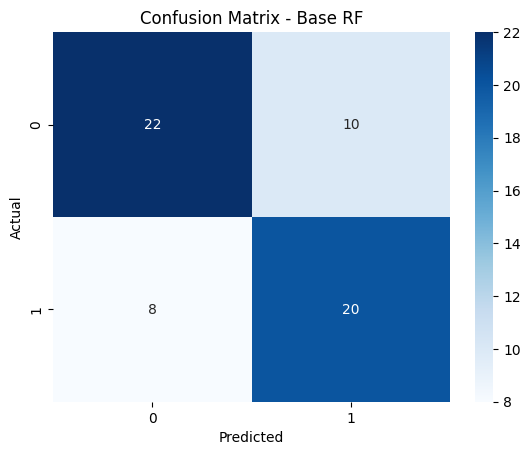

In [30]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Base RF")
plt.show()


 Best RF Parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
Best RF CV Score: 0.8645390070921986

 Tuned RF Model Performance
Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.79      0.72      0.75        32
           1       0.71      0.79      0.75        28

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60



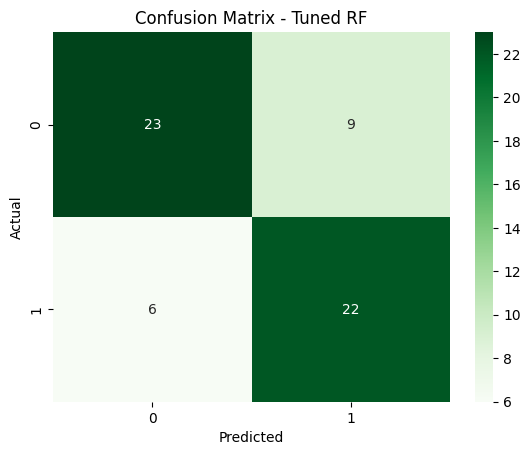


 RF CV Scores: [0.91666667 0.91666667 0.78723404 0.85106383 0.85106383]
Mean CV Score: 0.8645390070921986


In [31]:
# HYPERPARAMETER TUNING - RANDOM FOREST
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1)

grid_search.fit(X_train, y_train)

print("\n Best RF Parameters:", grid_search.best_params_)
print("Best RF CV Score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("\n Tuned RF Model Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

cm_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned RF")
plt.show()

# Cross-validation score
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5)
print("\n RF CV Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


 Best SVM Parameters: {'C': 0.1, 'kernel': 'rbf'}
Best SVM CV Score: 0.8687943262411346

 SVM Model Performance
Accuracy: 0.7166666666666667
              precision    recall  f1-score   support

           0       0.76      0.69      0.72        32
           1       0.68      0.75      0.71        28

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.72      0.72      0.72        60



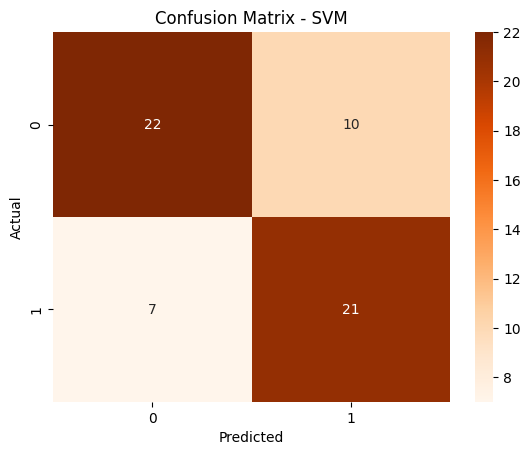

In [32]:
#TRAIN SVM FOR COMPARISON
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(
    SVC(random_state=42),
    svm_param_grid,
    cv=5,
    n_jobs=-1)
svm_grid.fit(X_train, y_train)

print("\n Best SVM Parameters:", svm_grid.best_params_)
print("Best SVM CV Score:", svm_grid.best_score_)

svm_best = svm_grid.best_estimator_
y_pred_svm = svm_best.predict(X_test)

print("\n SVM Model Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

**Model Evaluation and Optimization**

In [33]:
# Evaluate using multiple metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve)
# Evaluate the best RF model
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for ROC

print("\n FINAL Random Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))


 FINAL Random Forest Model Evaluation:
Accuracy: 0.75
Precision: 0.7096774193548387
Recall: 0.7857142857142857
F1 Score: 0.7457627118644068
ROC AUC: 0.8493303571428572


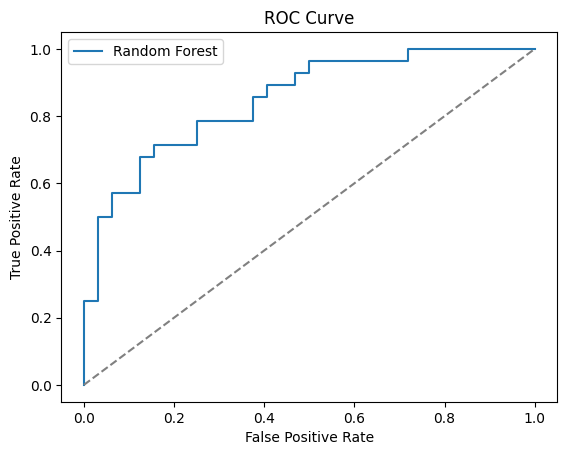

In [34]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [35]:
# Try Random Search for hyperparameters

from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4]}

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    random_state=42,
    n_jobs=-1)

random_search.fit(X_train, y_train)
print("\n Random Search Best Params:", random_search.best_params_)
print("Random Search Best CV Score:", random_search.best_score_)


 Random Search Best Params: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Random Search Best CV Score: 0.8643617021276595


In [36]:
#  Example of L1 / L2 Regularization
from sklearn.linear_model import LogisticRegression
# L1 Regularization (Lasso)
lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("\n L1 Regularized Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lasso))
print(classification_report(y_test, y_pred_lasso))

# L2 Regularization (Ridge)
ridge = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("\n L2 Regularized Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_ridge))
print(classification_report(y_test, y_pred_ridge))


 L1 Regularized Logistic Regression:
Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.79      0.72      0.75        32
           1       0.71      0.79      0.75        28

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60


 L2 Regularized Logistic Regression:
Accuracy: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [41]:
# Dropout is for neural nets
print("\\n Note: Dropout is used in deep learning models (e.g., TensorFlow/Keras). "
      "\nIt randomly drops units during training to prevent overfitting. "
      "\nIt does not apply to Random Forest or Logistic Regression directly.")

\n Note: Dropout is used in deep learning models (e.g., TensorFlow/Keras). 
It randomly drops units during training to prevent overfitting. 
It does not apply to Random Forest or Logistic Regression directly.
